In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Neural_Network(object):
    def __init__(self,lrate = 0.05,iterations=500):
        #parameters
        self.outputSize = 1
        self.hiddenSize = 3
        self.learning_rate = lrate
        self.num_iter = iterations
        
        self.loss = []

#         print(X.shape, X.shape[1], self.W1.shape, self.inputSize)

    def forward(self, X):
        #forward propagation through our network
        self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
        o = self.sigmoid(self.z3) # final activation function
        return o

    def sigmoid(self, s):
        # activation function
        return 1/(1+np.exp(-s))

    def sigmoidPrime(self, s):
        #derivative of sigmoid
        return s * (1 - s)

    def backward(self, X, y, o):
        # backward propagate through the network
        self.o_error = y - o # error in output
        self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error
        self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

        self.W1 += self.learning_rate*X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
        self.W2 += self.learning_rate*self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

    def train(self, X, y):
        #weights
        self.W1 = np.full((X.shape[1], self.hiddenSize), 1 / (1 + X.shape[1]))
        self.W2 = np.full((self.hiddenSize, self.outputSize), 1 / (1 + self.hiddenSize))
        print(self.W1.shape, self.W2.shape)
        for i in range(self.num_iter):
            o = self.forward(X)
            self.loss.append(np.mean(np.square(y - o)))
            self.backward(X, y, o)
            
    def predict(self, X):
        return np.where(self.forward(X) >= 0.25, 1, 0)


In [13]:
dataset = "IRIS"
df_iris = pd.read_csv(dataset + '.csv')
# df_iris.sample(frac=1)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_iris.iloc[:, :-1].values, df_iris.iloc[:, -1:].values, test_size=0.2, random_state=10)

y_train = np.where(y_train == 'Iris-setosa', 1, 0)
y_test = np.where(y_test == 'Iris-setosa', 1, 0)

In [15]:
NN = Neural_Network(0.01,500)
NN.train(X_train, y_train)
loss_train = NN.loss
# accuracy
# precision
# recall

(4, 3) (3, 1)


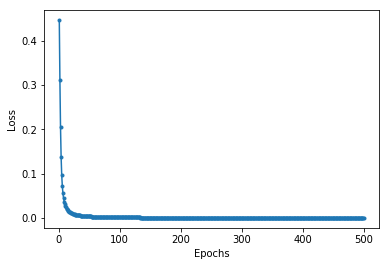

In [16]:
plt.plot(range(1, len(loss_train) + 1), loss_train, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [17]:
print('Final Training Acc: {}'.format((NN.predict(X_train) == y_train).mean()))
print('Final Test Acc: {}'.format((NN.predict(X_test) == y_test).mean()))
pred = NN.predict(X_test)
t_p = f_p = t_n = f_n = 0
for i, j in zip(pred, y_test):
    t_p += (i == True and j == True)
    f_p += (i == True and j == False)
    t_n += (i == False and j == False)
    f_n += (i == False and j == True)
print(t_p,f_p,t_n,f_n)
print("Recall: {}".format(t_p / (f_n + t_p)))
print("Precision: {}".format(t_p / (f_p + t_p)))

Final Training Acc: 1.0
Final Test Acc: 1.0
[0] [0] [30] [0]
Recall: [nan]
Precision: [nan]


/home/student/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/student/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [27]:
dataset = "SPECT"
df_iris = pd.read_csv(dataset + '.csv')
df_iris.sample(frac=1)
df_iris.head()

,Class,Attr_1,Attr_2,Attr_3,Attr_4,Attr_5,Attr_6,Attr_7,Attr_8,Attr_9,...,Attr_13,Attr_14,Attr_15,Attr_16,Attr_17,Attr_18,Attr_19,Attr_20,Attr_21,Attr_22
0,Yes,0,0,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
1,Yes,0,0,1,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,1
2,Yes,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,Yes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,Yes,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_iris.iloc[:, 1:].values, df_iris.iloc[:, 0:1].values, test_size=0.2, random_state=10)

y_train = np.where(y_train == 'Yes', 1, 0)
y_test = np.where(y_test == 'Yes', 1, 0)

In [37]:
NN = Neural_Network(0.05,2000)
NN.train(X_train, y_train)
loss_train = NN.loss
# accuracy
# precision
# recall

(22, 3) (3, 1)


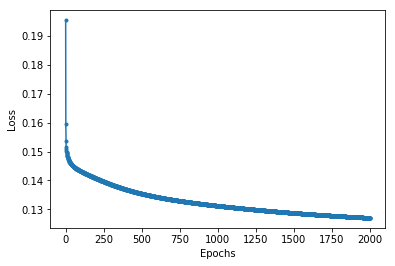

In [30]:
plt.plot(range(1, len(loss_train) + 1), loss_train, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [31]:
print('Final Training Accuracy: {}'.format((NN.predict(X_train) == y_train).mean()))
print('Final Test Accuracy: {}'.format((NN.predict(X_test) == y_test).mean()))
pred = NN.predict(X_test)

t_p = f_p = t_n = f_n = 0
for i, j in zip(pred, y_test):
    t_p += (i == True and j == True)
    f_p += (i == True and j == False)
    t_n += (i == False and j == False)
    f_n += (i == False and j == True)
print(t_p,f_p,t_n,f_n)
print("Recall: {}".format(t_p / (f_n + t_p)))
print("Precision: {}".format(t_p / (f_p + t_p)))

Final Training Accuracy: 0.7981220657276995
Final Test Accuracy: 0.7777777777777778
[42] [12] [0] [0]
Recall: [1.]
Precision: [0.77777778]


In [35]:
def crossval(X,y,n):
    l = len(X)
    part = l//n
    ptr = part
    for i in range(n):
        NN = Neural_Network(0.05,2000)
        X_train, X_test, y_train, y_test = train_test_split(df_iris.iloc[:, 1:].values, df_iris.iloc[:, 0:1].values, test_size=ptr/l, random_state=10)
        y_train = np.where(y_train == 'Yes', 1, 0)
        y_test = np.where(y_test == 'Yes', 1, 0)
        print('Final Training Accuracy: {}'.format((NN.predict(X[ptr:]) == y[ptr:]).mean()))
        print('Final Test Accuracy: {}'.format((NN.predict(X[:ptr]) == y[:ptr]).mean()))
        ptr += part
        print(ptr)

In [38]:
crossval(df_iris.iloc[:, 1:].values, df_iris.iloc[:, 0:1].values,5)

AttributeError: 'Neural_Network' object has no attribute 'W1'

In [45]:
dataset = "SPECT"
df_iris = pd.read_csv(dataset + '.csv')
df_iris.sample(frac=1)
df_iris.head()
arr = []
for i in range(0,10):    
    X_train, X_test, y_train, y_test = train_test_split(df_iris.iloc[:, 1:].values, df_iris.iloc[:, 0:1].values, test_size=0.1*i, random_state=10)

    y_train = np.where(y_train == 'Yes', 1, 0)
    y_test = np.where(y_test == 'Yes', 1, 0)
    NN = Neural_Network(0.05,2000)
    NN.train(X_train, y_train)
    print('Final Training Accuracy: {}'.format((NN.predict(X_train) == y_train).mean()))
    print('Final Test Accuracy: {}'.format((NN.predict(X_test) == y_test).mean()))
    arr.append((NN.predict(X_test) == y_test).mean())
print(sum(arr[1:])/(len(arr)-1))

(22, 3) (3, 1)
Final Training Accuracy: 0.7940074906367042
Final Test Accuracy: nan
(22, 3) (3, 1)


/home/student/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice.
  
/home/student/.local/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/student/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app


Final Training Accuracy: 0.8083333333333333
Final Test Accuracy: 0.6666666666666666
(22, 3) (3, 1)
Final Training Accuracy: 0.7981220657276995
Final Test Accuracy: 0.7777777777777778
(22, 3) (3, 1)
Final Training Accuracy: 0.7849462365591398
Final Test Accuracy: 0.8148148148148148
(22, 3) (3, 1)
Final Training Accuracy: 0.78125
Final Test Accuracy: 0.8130841121495327
(22, 3) (3, 1)
Final Training Accuracy: 0.7894736842105263
Final Test Accuracy: 0.7985074626865671
(22, 3) (3, 1)
Final Training Accuracy: 0.7924528301886793
Final Test Accuracy: 0.7950310559006211
(22, 3) (3, 1)
Final Training Accuracy: 0.775
Final Test Accuracy: 0.8021390374331551
(22, 3) (3, 1)
Final Training Accuracy: 0.7358490566037735
Final Test Accuracy: 0.8084112149532711
(22, 3) (3, 1)
Final Training Accuracy: 0.6923076923076923
Final Test Accuracy: 0.8049792531120332
0.7868234883882709
